In [35]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so
# Apply the default theme
sns.set_theme()
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../scripts")
import helpers as h
import window_detect2 as w
import scores as s
import paper_data as p

import pickle
from tabulate import tabulate

from IPython.display import Markdown as md
from scipy import stats

## Final Data

In [8]:
a00, a01 = h.import_desired_data("A", "15T")
b00, b01 = h.import_desired_data("B", "15T")
c00, c01 = h.import_desired_data("C", "15T")
pa = p.Paper_Data(a01)
pb = p.Paper_Data(b00)
pc = p.Paper_Data(c00)

In [27]:
ta = stats.ttest_ind(pa.exp["Temp C"], pa.exp["Ambient Temp"])
ta

Ttest_indResult(statistic=33.30245062719097, pvalue=3.44104235312015e-151)

In [25]:
tb = stats.ttest_ind(pb.exp["Temp C"], pb.exp["Ambient Temp"])
tb

Ttest_indResult(statistic=47.912302123869715, pvalue=0.0)

In [24]:
tc = stats.ttest_ind(pc.exp["Temp C"], pc.exp["Ambient Temp"])
tc

Ttest_indResult(statistic=18.818752058241344, pvalue=6.152334667348376e-62)

In [32]:
def qr(num):
    return np.round(num, 2)
def p_check(p):
    if p < 0.05:
        return "<"
    else:
        return ">"
def t_write(data, t_test_res):
    return f"t({len(data)})={qr(t_test_res[0])}, p{p_check(t_test_res[1])}0.05"


In [34]:
md(f"Performing a statistical t-test to analyze the differences between indoor and ambient temperatures acroos the datasets allowed us to see that experiment B had the greatest distinction {t_write(pb.exp, tb)}, while experiment C had the smallest, {t_write(pc.exp, tc)}.")

Performing a statistical t-test to analyze the differences between indoor and ambient temperatures acroos the datasets allowed us to see that experiment B had the greatest distinction t(1388)=47.91, p<0.05, while experiment C had the smallest, t(289)=18.82, p<0.05.

### Temperature Plots

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.temp_fig.show()


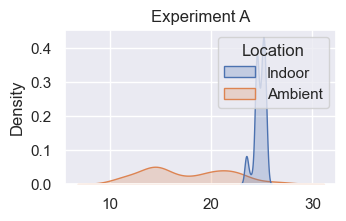

In [9]:
f = pa.plot_temperatures("Experiment A", )

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.temp_fig.show()


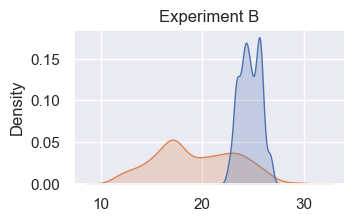

In [10]:
f = pb.plot_temperatures("Experiment B", True)

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.temp_fig.show()


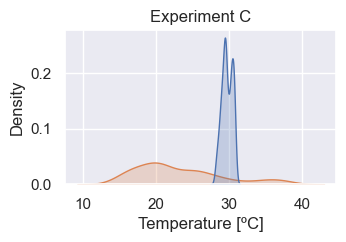

In [11]:
f = pc.plot_temperatures("Experiment C", True, True)

### Table

In [12]:
table_data = {
    "A": pa.calc_table_data(),
    "B": pb.calc_table_data(),
    "C": pc.calc_table_data()
}

tdf = pd.DataFrame(table_data)
tdf

# maybe number of openings?

A
A


,A,B,C
Room,1,0,0
Starting Day,Jul 20,Jul 27,Sep 08
Data Length,4 days 00:00:00,14 days 10:45:00,3 days 00:00:00
Opening Percentage,58.7,94.8,77.9
Hours Open,56.5,329.0,56.2
Median Indoor Temp. [ºC],24.84,24.62,29.6
Median In/Out Temp. Diff. [ºC],7.5,5.68,8.26
Meean Indoor Temp. [ºC],24.78,24.65,29.71
Mean In/Out Temp. Diff. [ºC],7.15,5.3,6.58


In [7]:
tdf.loc["Data Length"] = tdf.loc["Data Length"].apply(lambda x: f"{x.days} days")
tdf

,A,B,C
Room,1,0,0
Starting Day,Jul 20,Jul 27,Sep 08
Data Length,4 days,14 days,3 days
Opening Percentage,58.7,94.8,77.9
Hours Open,56.5,329.0,56.2
Median Indoor Temp. [ºC],24.84,24.62,29.6
Median In/Out Temp. Diff. [ºC],7.5,5.68,8.26


In [8]:
print(tdf.to_latex())

\begin{tabular}{llll}
\toprule
{} &       A &        B &       C \\
\midrule
Room                           &       1 &        0 &       0 \\
Starting Day                   &  Jul 20 &   Jul 27 &  Sep 08 \\
Data Length                    &  4 days &  14 days &  3 days \\
Opening Percentage             &    58.7 &     94.8 &    77.9 \\
Hours Open                     &    56.5 &    329.0 &    56.2 \\
Median Indoor Temp. [ºC]       &   24.84 &    24.62 &    29.6 \\
Median In/Out Temp. Diff. [ºC] &     7.5 &     5.68 &    8.26 \\
\bottomrule
\end{tabular}



/var/folders/7r/39t1cgb13d57zk26c__2z50m0000gn/T/ipykernel_77001/3115410626.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tdf.to_latex())


In [ ]:
tdf.to_pickle("../../summary/230613_buildsys/variables/measurements_df.pkl")

### Temp + RH Plots

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.dist_fig.show()


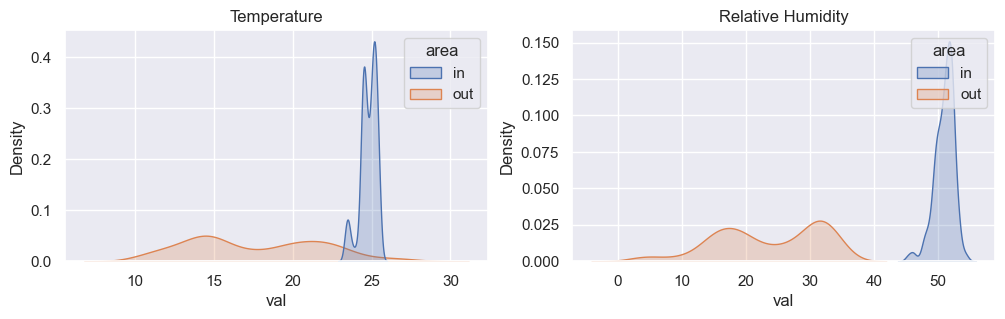

In [ ]:
f = pa.plot_distributions()

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.dist_fig.show()


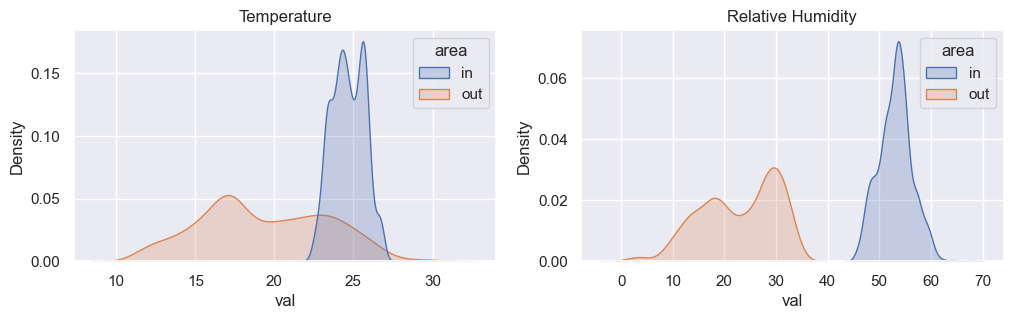

In [ ]:
f = pb.plot_distributions()

/Users/julietnwagwuume-ezeoke/_UILCode/windows/analysis/notebooks/../scripts/paper_data.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.dist_fig.show()


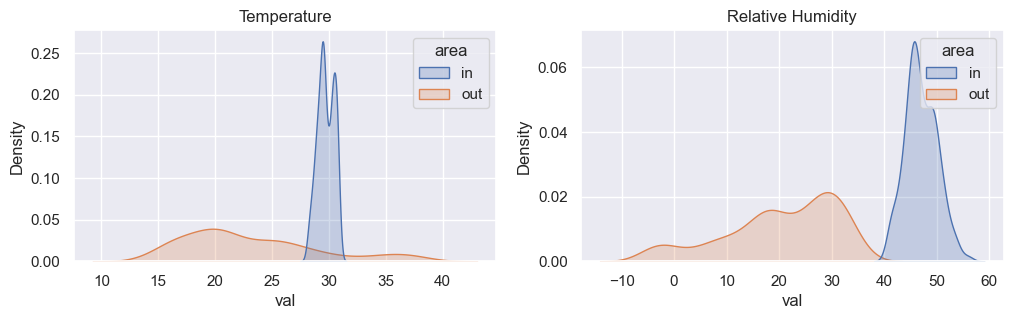

In [ ]:
f = pc.plot_distributions()

In [ ]:
# todo =>plot so share an x axis across experiments  

# Developing 

In [ ]:
# measured data 
a00, a01 = h.import_desired_data("A", "15T")
temp0 =h.normalize(a01["Temp C"]) 
window_sched = a01["Window Open"]
datetime = a01["DateTime"]

### temperature and rh distributions 

In [ ]:
in_val = {
    "val": a01["Temp C"],
    "area": pd.Series(["in"]*len(a01))
}
out_val  = {
    "val": a01["Ambient Temp"],
    "area": ["out"]*len(a01)
}

temps = pd.concat([pd.DataFrame(in_val), pd.DataFrame(out_val)])

In [ ]:
in_val = {
    "val": a01["RH %"],
    "area": pd.Series(["in"]*len(a01))
}
out_val  = {
    "val": a01["Ambient RH"],
    "area": ["out"]*len(a01)
}

rhs = pd.concat([pd.DataFrame(in_val), pd.DataFrame(out_val)])

Text(0.5, 1.0, 'Relative Humidity')

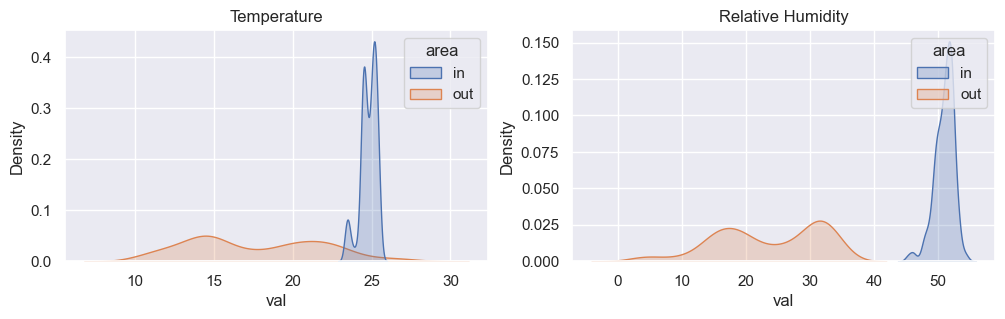

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(12, 3))
sns.kdeplot(data=temps,  x="val", hue="area",  fill=True, ax=axs[0])
axs[0].set_title("Temperature")
sns.kdeplot(data=rhs,  x="val", hue="area",  fill=True, ax=axs[1])
axs[1].set_title("Relative Humidity")

### general

In [ ]:
starting_day = datetime[0]
starting_day

Timestamp('2022-07-20 07:15:00')

In [ ]:
data_length = datetime.iloc[-1] - datetime[0]
data_length

Timedelta('4 days 00:00:00')

In [ ]:
room = a01["Room"][0]
room

1.0

### average time of window open

In [ ]:
timedelta = datetime[1] - datetime[0]
timedelta


Timedelta('0 days 00:15:00')

In [ ]:
guess_times_ix = s.identify_changed_ix(window_sched)

pred_change = {change_ix: time_ix for  change_ix, time_ix in  enumerate(guess_times_ix)}

pred_change

{0: 0,
 1: 2,
 2: 21,
 3: 61,
 4: 120,
 5: 127,
 6: 137,
 7: 158,
 8: 194,
 9: 208,
 10: 227,
 11: 255,
 12: 338}

In [ ]:
window_sched[0]

0.0

In [ ]:
start_vals = list(pred_change.values())[1::2]
close_vals = list(pred_change.values())[2::2]

ixes = [(i,j) for i,j in zip(start_vals, close_vals)]
ixes

[(2, 21), (61, 120), (127, 137), (158, 194), (208, 227), (255, 338)]

In [ ]:
lens = []
for i in range(len(ixes)):
    window_vals = window_sched[ixes[i][0]:ixes[i][1]]
    assert window_vals.all() # all the values should be 1 
    lens.append(len(window_vals))

avg_len = np.mean(np.array((lens)))
avg_len*timedelta, lens

(Timedelta('0 days 09:24:59.999999999'), [19, 59, 10, 36, 19, 83])

### percent open 

In [ ]:
win_open_group =  a01.groupby("Window Open").count()
win_open_group

,DateTime,Temp C,RH %,Room,Ambient Temp,Ambient RH
Window Open,,,,,,
0.0,159,159,159,159,159,159
1.0,226,226,226,226,226,226


In [ ]:
total_time_periods = win_open_group.iloc[1]["DateTime"] + win_open_group.iloc[0]["DateTime"]
open_time_periods = win_open_group.iloc[0]["DateTime"]
open_time_periods

159

In [ ]:
perc_time_open = open_time_periods/total_time_periods
perc_time_open

0.412987012987013